coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839


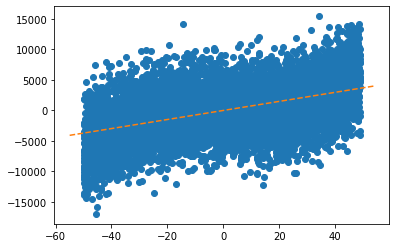

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
temp_x = []
temp_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

In [2]:
import random
inline2 = open('../Linear-Regression/data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
var = list(range(len(data)))
random.shuffle(var)
packets = len(data)/10
temp_test_x = []
temp_test_y = []
resampled_x = []
resampled_y = []
temp_kx = []
temp_ky = []
z = 0

for i in var:
    if((z+1)%packets == 0):
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
        resampled_x.append(temp_kx)
        resampled_y.append(temp_ky)
        temp_ky = []
        temp_kx = []
    else:
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
    z+=1

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])
    
print(var)
print("Resampled X : \n" + str(resampled_x))
print("Resampled Y : \n" + str(resampled_y))

[4564, 5179, 2445, 6060, 3764, 2680, 5435, 700, 3306, 1193, 5088, 7841, 4530, 7731, 2732, 2961, 6961, 6073, 5961, 4818, 7891, 3924, 4242, 3493, 2439, 4041, 5925, 3983, 3850, 4619, 4715, 7448, 7931, 828, 5213, 4821, 5475, 5652, 6489, 7207, 6650, 3480, 3727, 2137, 3183, 96, 4284, 5219, 1887, 6211, 987, 6364, 7225, 5098, 3937, 296, 1733, 2123, 1559, 869, 5196, 149, 558, 5078, 1412, 3600, 6856, 2333, 247, 6955, 4023, 7493, 804, 4280, 1014, 351, 5377, 6521, 5666, 4789, 2411, 2864, 2952, 7410, 73, 1563, 6566, 1931, 785, 6301, 6444, 2651, 1846, 7474, 7741, 5994, 1975, 1159, 3897, 7864, 1528, 5487, 4050, 3943, 946, 2681, 6192, 4759, 1826, 4382, 6775, 6658, 2301, 4643, 11, 4562, 3782, 575, 4946, 5511, 4766, 3210, 3665, 2200, 2089, 6081, 1339, 6052, 7091, 2628, 501, 2266, 6575, 2284, 7273, 15, 232, 3172, 6288, 5895, 55, 6449, 1560, 3049, 2541, 4129, 5100, 3105, 727, 6529, 1025, 3581, 730, 7306, 7408, 5588, 1590, 3066, 3793, 815, 1512, 1268, 3780, 2697, 1735, 5812, 911, 1932, 2015, 872, 7194, 255

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import math

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

temp_test_x2 = np.array(temp_test_x).reshape(-1,1)

mean_bias = []
squared_mean_bias = []
mean_variance = []
total_polynomials = 10
total_error = []
# irreduceble_error = []

for i in range(1,total_polynomials+1):        # Polynomial loop
    poly_bias = []
    val_mean = 0
    val_squared_mean = 0
    val_variance = 0
    temp_total_error = 0
    bias = [0 for k in range(1,total_polynomials+1)]
    for j in range(0,10):       # test case loop
        abc = np.array(resampled_x[j]).reshape(-1,1)
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(abc)
        poly_reg.fit(X_poly,y)
        # print("i : " + str(i) + " | j : "+ str(j))
        lin_reg = LinearRegression().fit(X_poly,resampled_y[j])
        # plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o')
        predicted_value = lin_reg.predict(poly_reg.fit_transform(temp_test_x2))
        poly_bias.append(predicted_value)
    # finding bias below :
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_squared_mean +=  math.pow((temp - temp_test_y[j]),2)
            val_mean += abs(temp - temp_test_y[j])
    val_mean = val_mean/len(poly_bias[0])
    val_squared_mean = val_squared_mean/len(poly_bias[0])
    mean_bias.append(val_mean)
    squared_mean_bias.append(val_squared_mean)
    # variance finding down :
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_variance +=  math.pow((temp - poly_bias[k][j]),2)
    val_variance = val_variance/len(poly_bias[0])
    mean_variance.append(val_variance)
    # total error below :
    for j in range(0,len(temp_test_y)):
        for k in range(0,10):
            temp_total_error += math.pow(temp_test_y[j] - poly_bias[k][j],2)
    temp_total_error = temp_total_error/len(poly_bias[0])
    total_error.append(temp_total_error)
        
irreduceble_error = [(total_error[i] - squared_mean_bias[i] - mean_variance[i]) for i in range(0,total_polynomials)]
print("\x1b[6;30;46m"+"Mean Bias : " + "\x1b[0m" + "\n",mean_bias)
print("\x1b[6;30;46m"+"Squared Mean Bias : " + "\x1b[0m" + "\n",squared_mean_bias)
print("\x1b[6;30;46m"+"Mean Variance : " + "\x1b[0m" + "\n",mean_variance)
print("\x1b[6;30;46m"+"Total Error : " + "\x1b[0m" + "\n",total_error)
print("\x1b[6;30;46m"+"Irreduceble Error : " + "\x1b[0m" + "\n",irreduceble_error)

Mean Bias : 
 [8202.165334139241, 8112.52809173638, 672.9765428881396, 733.4611202711228, 730.6592441254713, 714.952135512585, 803.6085732542011, 807.0989515234885, 807.0401226735709, 843.7202687538999]
Squared Mean Bias : 
 [10051016.9303724, 9573228.627455134, 88467.00182888833, 82283.90711556337, 79057.63537855711, 75265.93479859465, 88223.35057742397, 85295.99098311135, 83489.13044278427, 96219.00578363371]
Mean Variance : 
 [557177.6534249247, 731768.610866966, 751719.1786114967, 783876.6186505505, 1035829.012209421, 1141295.5745178526, 1289850.1340361629, 1536731.9677355746, 1616556.5346741774, 1646936.7600754006]
Total Error : 
 [10608194.583797341, 10304997.23832209, 840186.1804403845, 866160.5257661147, 1114886.6475879778, 1216561.5093164458, 1378073.4846135878, 1622027.9587186852, 1700045.6651169597, 1743155.7658590344]
Irreduceble Error : 
 [1.6298145055770874e-08, -9.546056389808655e-09, -4.656612873077393e-10, 8.149072527885437e-10, -3.4924596548080444e-10, -1.396983861923

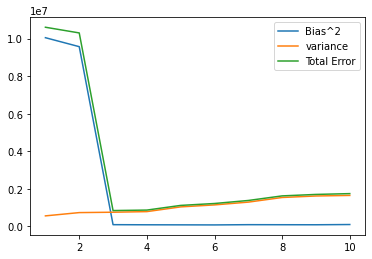

In [4]:
plt.plot([i for i in range(1,total_polynomials + 1)],squared_mean_bias,label='Bias^2')
plt.plot([i for i in range(1,total_polynomials + 1)],mean_variance,label='variance')
plt.plot([i for i in range(1,total_polynomials + 1)],total_error,label='Total Error')
plt.legend()
# plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o', color='red')
# abline(reg.coef_,reg.intercept_)
plt.show()